In [1]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.random import set_seed

from kaggle_prediction_interval_birthweight.workflow.validation import Validator

np.random.seed(1)
set_seed(1)

In [3]:
def plot_result(obs, lower, upper, lower_new, upper_new):
    fig, ax = plt.subplots(1, 3, figsize=(10, 3))
    ax[0].vlines(x=obs, ymin=lower, ymax=upper, alpha=0.25)
    ax[0].set_xlim(
        np.min(np.concatenate([obs, lower])), np.max(np.concatenate([obs, upper]))
    )
    ax[0].set_ylim(
        np.min(np.concatenate([obs, lower])), np.max(np.concatenate([obs, upper]))
    )
    ax[0].plot([0, 1], [0, 1], transform=ax[0].transAxes, color="orange")
    ax[0].set_xlabel("observations")
    ax[0].set_ylabel("predictions")
    ax[1].hist(lower, bins=100, density=True, color="blue", alpha=0.75, label="train")
    ax[1].hist(
        lower_new, bins=100, density=True, color="orange", alpha=0.75, label="test"
    )
    ax[1].set_xlabel("predicted lower bounds")
    ax[1].legend()
    ax[2].hist(upper, bins=100, density=True, color="blue", alpha=0.75, label="train")
    ax[2].hist(
        upper_new, bins=100, density=True, color="orange", alpha=0.75, label="test"
    )
    ax[2].set_xlabel("predicted upper bounds")
    ax[2].legend()
    plt.show()

In [4]:
data = pd.read_csv("~/dev/data/kaggle-prediction-interval-birthweight/train.csv")
data_test = pd.read_csv("~/dev/data/kaggle-prediction-interval-birthweight/test.csv")

Validation on fold 1 of 2 begins.
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Calibrating with Mapie.


/Users/hunter.merrill/Library/Caches/pypoetry/virtualenvs/kaggle-prediction-interval-birthweight-irFUtOWA-py3.11/lib/python3.11/site-packages/mapie/regression/quantile_regression.py:201: UserWarning: WARNING: The alpha that is set needs to be the same as the alpha of your prefitted model in the following order [alpha/2, 1 - alpha/2, 0.5]
  warnings.warn(
/Users/hunter.merrill/Library/Caches/pypoetry/virtualenvs/kaggle-prediction-interval-birthweight-irFUtOWA-py3.11/lib/python3.11/site-packages/mapie/utils.py:519: UserWarning: WARNING: The predictions of the quantile regression have issues.
The upper quantile predictions are lower
than the lower quantile predictions
at some points.
  warnings.warn(
/Users/hunter.merrill/Library/Caches/pypoetry/virtualenvs/kaggle-prediction-interval-birthweight-irFUtOWA-py3.11/lib/python3.11/site-packages/mapie/utils.py:537: UserWarning: WARNING: The predictions have issues.
The upper predictions are lower thanthe lower predictions at some points.
  warn

Validation on fold 2 of 2 begins.
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Calibrating with Mapie.


/Users/hunter.merrill/Library/Caches/pypoetry/virtualenvs/kaggle-prediction-interval-birthweight-irFUtOWA-py3.11/lib/python3.11/site-packages/mapie/regression/quantile_regression.py:201: UserWarning: WARNING: The alpha that is set needs to be the same as the alpha of your prefitted model in the following order [alpha/2, 1 - alpha/2, 0.5]
  warnings.warn(
/Users/hunter.merrill/Library/Caches/pypoetry/virtualenvs/kaggle-prediction-interval-birthweight-irFUtOWA-py3.11/lib/python3.11/site-packages/mapie/utils.py:519: UserWarning: WARNING: The predictions of the quantile regression have issues.
The upper quantile predictions are lower
than the lower quantile predictions
at some points.
  warnings.warn(
/Users/hunter.merrill/Library/Caches/pypoetry/virtualenvs/kaggle-prediction-interval-birthweight-irFUtOWA-py3.11/lib/python3.11/site-packages/mapie/utils.py:537: UserWarning: WARNING: The predictions have issues.
The upper predictions are lower thanthe lower predictions at some points.
  warn

NOIS is 1758.0 and coverage is 89.9%.


/Users/hunter.merrill/Library/Caches/pypoetry/virtualenvs/kaggle-prediction-interval-birthweight-irFUtOWA-py3.11/lib/python3.11/site-packages/mapie/utils.py:519: UserWarning: WARNING: The predictions of the quantile regression have issues.
The upper quantile predictions are lower
than the lower quantile predictions
at some points.
  warnings.warn(
/Users/hunter.merrill/Library/Caches/pypoetry/virtualenvs/kaggle-prediction-interval-birthweight-irFUtOWA-py3.11/lib/python3.11/site-packages/mapie/utils.py:537: UserWarning: WARNING: The predictions have issues.
The upper predictions are lower thanthe lower predictions at some points.
  warnings.warn(
/Users/hunter.merrill/Library/Caches/pypoetry/virtualenvs/kaggle-prediction-interval-birthweight-irFUtOWA-py3.11/lib/python3.11/site-packages/mapie/utils.py:519: UserWarning: WARNING: The predictions of the quantile regression have issues.
The upper quantile predictions are lower
than the lower quantile predictions
at some points.
  warnings.wa

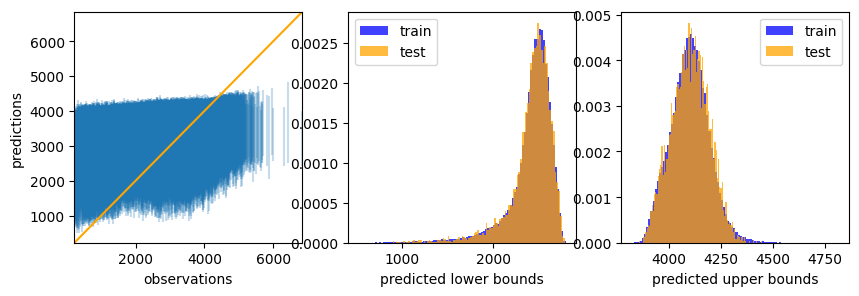

In [5]:
eim_validator = Validator("HistBoostRegressor")
eim_validator.fit(data)
eim_validator.print_performance_summary()

lower, upper = eim_validator.predict_intervals(data)
lower_new, upper_new = eim_validator.predict_intervals(data_test)

plot_result(data["DBWT"], lower, upper, lower_new, upper_new)